In [8]:
import numpy as np
import pandas as pd

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('1_boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
X = df.loc[:, df.columns != 'MEDV']
Y = df.loc[:, df.columns == 'MEDV']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
# Normalize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

C:\Users\ASHWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(metrics=['mae'], loss='mse', optimizer='adam')

In [25]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

In [42]:
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print(f"Mean Absolute Error: {mae:.2f}")

5/5 - 0s - 13ms/step - loss: 11.5300 - mae: 2.1702
Mean Absolute Error: 2.1702404022216797


In [31]:
import matplotlib.pyplot as plt

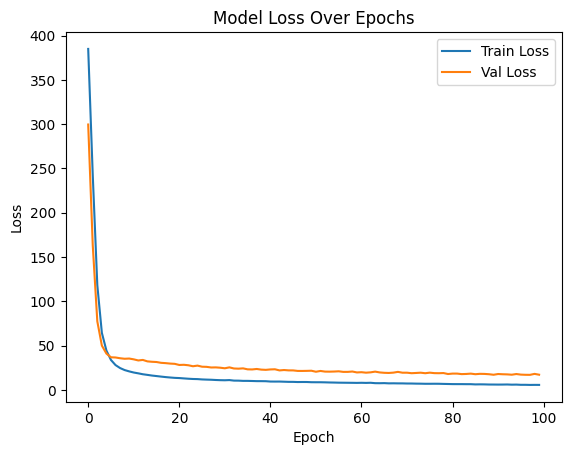

In [32]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [35]:
y_pred = model.predict(x_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[26.084461 ],
       [35.225216 ],
       [15.250387 ],
       [25.597134 ],
       [15.633343 ],
       [19.439678 ],
       [17.615839 ],
       [15.368893 ],
       [25.86109  ],
       [18.82795  ],
       [20.927456 ],
       [18.307348 ],
       [ 1.2752005],
       [17.838362 ],
       [18.039366 ],
       [22.361757 ],
       [20.565933 ],
       [10.201608 ],
       [46.653534 ],
       [13.349789 ],
       [26.142864 ],
       [26.687624 ],
       [15.929453 ],
       [23.064226 ],
       [17.128307 ],
       [18.02244  ],
       [20.971088 ],
       [11.692612 ],
       [19.80762  ],
       [17.763792 ],
       [22.916449 ],
       [23.3729   ],
       [18.63037  ],
       [25.679384 ],
       [15.206914 ],
       [16.52095  ],
       [32.37681  ],
       [21.372307 ],
       [20.219845 ],
       [25.405035 ],
       [17.09265  ],
       [29.586983 ],
       [50.278908 ],
       [17.971231 ],
       [25.316996 ],
       [16.348051 ],
       [16.467253 ],
       [27.23

In [36]:
mean_absolute_error(y_test, y_pred)

2.1702404022216797

In [37]:
mean_squared_error(y_test, y_pred)

11.530001640319824

In [38]:
import seaborn as sns

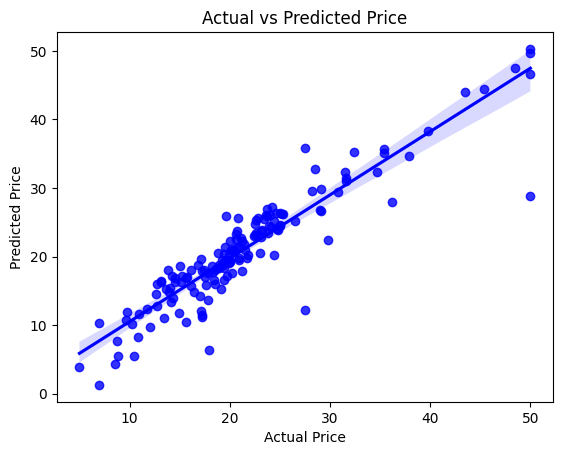

In [41]:
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()